<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Машинное обучение и майнинг данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# Занятие 2. Библиотеки и инструменты для анализа данных. Математика в машинном обучении

## Практическое задание. Анализ данных пассажиров "Титаника". Решение

In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
%pylab inline
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Считаем данные из файла в память в виде объекта Pandas.DataFrame

In [2]:
data = pd.read_csv('../../data/titanic_train.csv')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Возьмем первые 10 элементов столбца Parch - количество родителей и детей пассажира на борту:**

In [4]:
data['Parch'][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

**Отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br />
Если нет - посмотрите, как вычисляется выражение в квадратных в скобках.

In [5]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


**1. Сколько мужчин / жещин находилось на борту?**

In [7]:
print((data['Sex'] == 'male').sum())
print((data['Sex'] == 'female').sum())

577
314


In [8]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной Pclass (социально-экономический статус). Дополнительно - это же распределение только для мужчин / женщин.**


In [9]:
data['Pclass'].value_counts()
data[data['Sex'] == 'male']['Pclass'].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

Графически

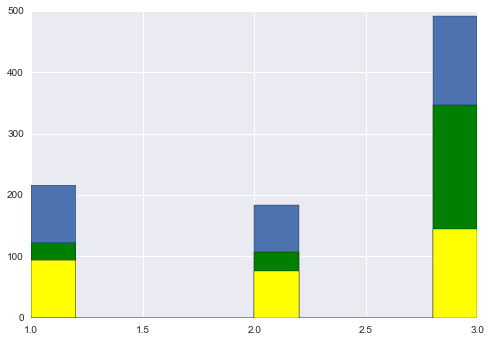

In [10]:
data['Pclass'].hist()
data[data['Sex'] == 'male']['Pclass'].hist(color="green")
data[data['Sex'] == 'female']['Pclass'].hist(color="yellow")

**3. Сколько в среднем заплатил один пассажир? Найдите дисперсию этой величины. Сколько все пассажиры заплатили в сумме?**

In [11]:
data['Fare'].mean(), data['Fare'].std(), data['Fare'].sum()

(32.2042079685746, 49.693428597180905, 28693.949299999967)

**4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики? Пусть "молодые" - те, кто моложе 30, а "старики" - те, кто старше 60.**

In [12]:
print(data[data['Age'] < 30]['Survived'].mean())
print(data[data['Age'] > 60]['Survived'].mean())

0.40625
0.227272727273


**5. Правда ли, что женщины выживали чаще мужчин?**

In [13]:
print(data[data['Sex'] == 'male']['Survived'].mean())
print(data[data['Sex'] == 'female']['Survived'].mean())

0.188908145581
0.742038216561


**6. Какое самое популярное имя среди пассажиров Титаника мужского пола?**

In [14]:
def parse_full_name(full_name):
    return full_name.split()[2] 

data[data['Sex'] == 'male']['Name'].apply(parse_full_name).value_counts().head()

William    35
John       25
George     14
Thomas     13
Charles    13
Name: Name, dtype: int64

**7. Сравните распределение стоимости билетов у спасенных и у погибших.**

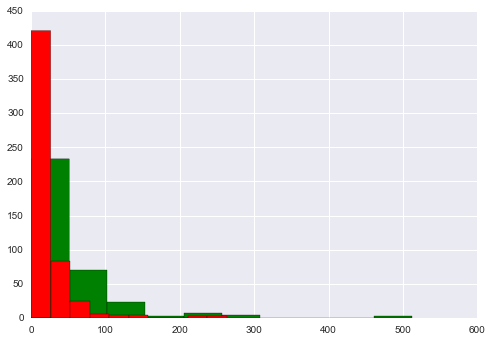

In [16]:
data[data['Survived'] == 1]['Fare'].hist(color="green")
data[data['Survived'] == 0]['Fare'].hist(color="red")

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?**

In [32]:
for cl in data['Pclass'].unique():
    for sex in data['Sex'].unique():
        print("Average age for {0} and class {1}: {2}".\
              format(sex, cl, 
            round(data[(data['Sex'] == sex)
            & (data['Pclass'] == cl)]['Age'].mean(), 3)))

Average age for male and class 3: 26.508
Average age for female and class 3: 21.75
Average age for male and class 1: 41.281
Average age for female and class 1: 34.612
Average age for male and class 2: 30.741
Average age for female and class 2: 28.723


**Удобней с pandas.groupby:**

In [20]:
for ((sex, pclass), sub_df) in pd.groupby(data, ['Sex', 'Pclass']):
    print("Average age for {0} and class {1}: {2}".format(sex, pclass, round(sub_df['Age'].mean(), 3)))

Average age for female and class 1: 34.612
Average age for female and class 2: 28.723
Average age for female and class 3: 21.75
Average age for male and class 1: 41.281
Average age for male and class 2: 30.741
Average age for male and class 3: 26.508
